In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data=pd.read_csv('Mtrain.csv')
train_data

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [3]:
test_data=pd.read_csv('Mtest.csv')
test_data

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


### Checking shape of datasets

In [4]:
train_data.shape

(159571, 8)

In [5]:
test_data.shape

(153164, 2)

### Describing the datasets

In [6]:
train_data.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
test_data.describe()

,id,comment_text
count,153164,153164
unique,153164,153164
top,9d5ed47fe6151fd5,":Shit, now Variety is saying 42. 21:14 7 Ja..."
freq,1,1


### Checking null values in datasets

In [8]:
train_data.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [9]:
test_data.isnull().sum()

id              0
comment_text    0
dtype: int64

### Visualization of training data

0    144277
1     15294
Name: malignant, dtype: int64


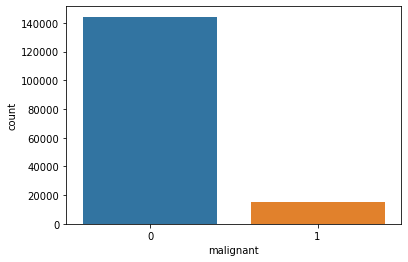

In [10]:
ax=sns.countplot(x='malignant',data=train_data)
print(train_data['malignant'].value_counts())

0    157976
1      1595
Name: highly_malignant, dtype: int64


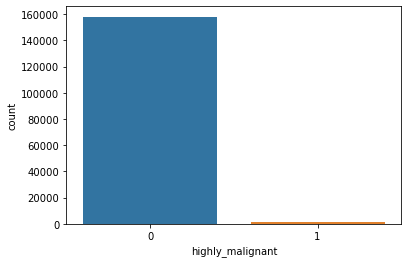

In [11]:
ax=sns.countplot(x='highly_malignant',data=train_data)
print(train_data['highly_malignant'].value_counts())

0    158166
1      1405
Name: loathe, dtype: int64


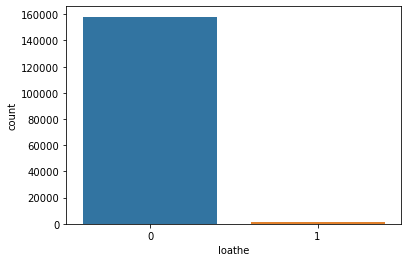

In [12]:
ax=sns.countplot(x='loathe',data=train_data)
print(train_data['loathe'].value_counts())

0    151122
1      8449
Name: rude, dtype: int64


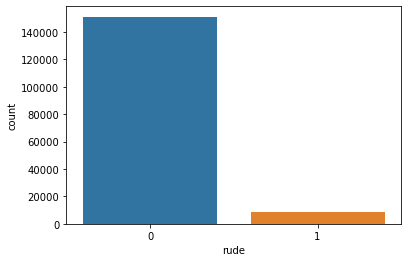

In [13]:
ax=sns.countplot(x='rude',data=train_data)
print(train_data['rude'].value_counts())

0    151694
1      7877
Name: abuse, dtype: int64


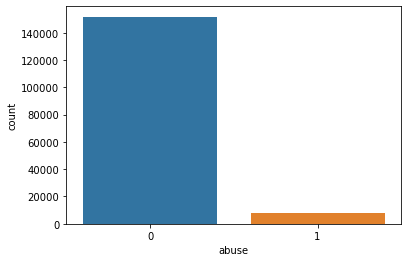

In [14]:
ax=sns.countplot(x='abuse',data=train_data)
print(train_data['abuse'].value_counts())

0    159093
1       478
Name: threat, dtype: int64


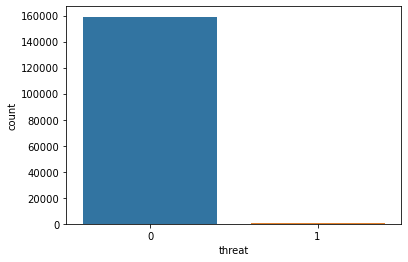

In [15]:
ax=sns.countplot(x='threat',data=train_data)
print(train_data['threat'].value_counts())

### Cleaning of training data

In [16]:
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import  stopwords
import string

### Creating column for length of comment

In [17]:
train_data['Length']=train_data.comment_text.str.len()

In [18]:
train_data.head(5)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,Length
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67


### Regular expressions for cleaning the comments

In [19]:
# convert all messages to lower case
train_data['comment_text'] = train_data['comment_text'].str.lower()

In [20]:
# Replace emailaddresses with 'emailaddress'
train_data['comment_text'] = train_data['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

In [21]:
# Replace Urls with 'webaddress'
train_data['comment_text'] = train_data['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

In [22]:
# Replace money symbols with 'moneysymbols' 
train_data['comment_text'] = train_data['comment_text'].str.replace(r'£|\$', 'dollers')

In [23]:
# Replace 10 digit phone numbers 
train_data['comment_text'] = train_data['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

In [24]:
# Replace numbers with 'number'
train_data['comment_text'] = train_data['comment_text'].str.replace(r'\d+(\.\d+)?', 'number')

In [25]:
# Remove Punctuatuations
train_data['comment_text'] = train_data['comment_text'].apply(lambda x: ' '.join(term for term in x.split() if term not in string.punctuation))

In [26]:
train_data['comment_text']=train_data['comment_text'].str.replace(r'[^\w\d\s]','')

In [27]:
# Remove White space between terms with single space
train_data['comment_text']=train_data['comment_text'].str.replace(r'\s+',' ')

In [28]:
# Remove leading and trailing white space
train_data['comment_text']=train_data['comment_text'].str.replace(r'^\s+|\s+?$','')

In [29]:
# Remove Stopwords
stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
train_data['comment_text'] = train_data['comment_text'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

In [30]:
# Lematization
lemma=WordNetLemmatizer()
train_data['comment_text'] = train_data['comment_text'].apply(lambda x: ' '.join(lemma.lemmatize(word) for word in x.split()))

### New column (clean_length) after punctuations and stopwords removal

In [31]:
train_data['clean_length']=train_data.comment_text.str.len()
train_data.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,Length,clean_length
0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0,264,179
1,000103f0d9cfb60f,daww match background colour seemingly stuck t...,0,0,0,0,0,0,112,95
2,000113f07ec002fd,hey man really trying edit war guy constantly ...,0,0,0,0,0,0,233,141
3,0001b41b1c6bb37e,cant make real suggestion improvement wondered...,0,0,0,0,0,0,622,370
4,0001d958c54c6e35,sir hero chance remember page thats,0,0,0,0,0,0,67,35


### Total length removal

In [32]:
print('Original length',train_data.Length.sum())

Original length 62893130


In [33]:
print('clean length',train_data.clean_length.sum())

clean length 40513150


### Getting sense of loud words

In [34]:
from wordcloud import WordCloud

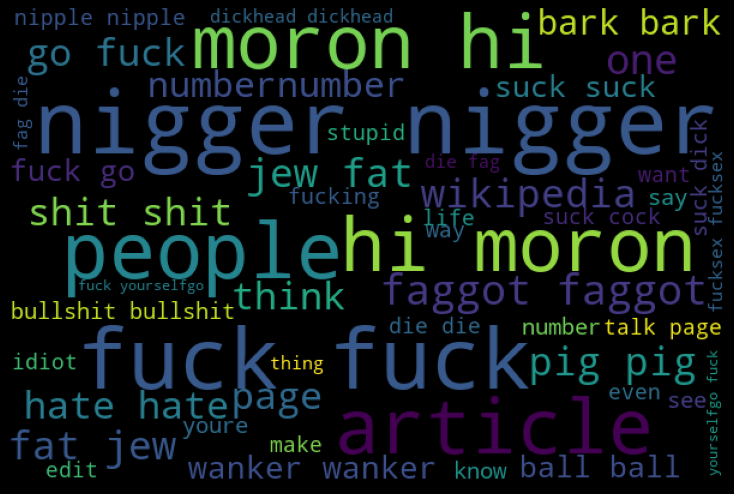

In [35]:
spams = train_data['comment_text'][train_data['malignant']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(spams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### Doing sum of the dependent columns and creating the final target column

In [36]:
Dependent_cols = train_data[['malignant','highly_malignant','rude','threat','abuse','loathe']]

In [37]:
train_data['Label'] =Dependent_cols.sum(axis =1)
print(train_data['Label'].value_counts())
train_data['Label'] = train_data['Label'] > 0 
train_data['Label'] = train_data['Label'].astype(int)
print(train_data['Label'].value_counts())

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: Label, dtype: int64
0    143346
1     16225
Name: Label, dtype: int64


In [38]:
train_data

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,Length,clean_length,Label
0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0,264,179,0
1,000103f0d9cfb60f,daww match background colour seemingly stuck t...,0,0,0,0,0,0,112,95,0
2,000113f07ec002fd,hey man really trying edit war guy constantly ...,0,0,0,0,0,0,233,141,0
3,0001b41b1c6bb37e,cant make real suggestion improvement wondered...,0,0,0,0,0,0,622,370,0
4,0001d958c54c6e35,sir hero chance remember page thats,0,0,0,0,0,0,67,35,0
...,...,...,...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,second time asking view completely contradicts...,0,0,0,0,0,0,295,183,0
159567,ffea4adeee384e90,ashamed horrible thing put talk page numbernumber,0,0,0,0,0,0,99,49,0
159568,ffee36eab5c267c9,spitzer umm there actual article prostitution ...,0,0,0,0,0,0,81,65,0
159569,fff125370e4aaaf3,look like actually put speedy first version de...,0,0,0,0,0,0,116,56,0


### Convert text into vectors using TF-IDF

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer(stop_words='english')
features = tf_vec.fit_transform(train_data['comment_text'])


### Creating Dependent and independent variable

In [40]:
x=features
y=train_data['Label']

### Train and Predict

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

### Finding best random state

In [44]:
maxAccu=0 #maximum accuracy
maxRS=0  # best random state value for which max accuracy is achieved
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Max Accuracy is',maxAccu,'on Random State ',maxRS)

Max Accuracy is 0.9553601270053476 on Random State  88


### Splitting dataset in training and testing data

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=88,test_size=.30)

### MultinomialNB

In [43]:
naive=MultinomialNB()
naive.fit(x_train,y_train)
y_pred=naive.predict(x_test)
accu=accuracy_score(y_test,y_pred)
print(accu) 

0.9181358622994652


### Logistic Regression

In [44]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
pred=LR.predict(x_test)
accuracy=accuracy_score(y_test,pred)
print(accuracy*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

95.53601270053476
[[42913   198]
 [ 1939  2822]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     43111
           1       0.93      0.59      0.73      4761

    accuracy                           0.96     47872
   macro avg       0.95      0.79      0.85     47872
weighted avg       0.95      0.96      0.95     47872



### Decision Tree Classifier

In [49]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)
pred=DT.predict(x_test)
print('Accuracy ',accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy  94.32444852941177
[[41802  1309]
 [ 1408  3353]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     43111
           1       0.72      0.70      0.71      4761

    accuracy                           0.94     47872
   macro avg       0.84      0.84      0.84     47872
weighted avg       0.94      0.94      0.94     47872



### Random Forest Classifier

In [50]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(x_train,y_train)
pred=RF.predict(x_test)
print('Accuracy ',accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy  95.27907754010695
[[42869   242]
 [ 2018  2743]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     43111
           1       0.92      0.58      0.71      4761

    accuracy                           0.95     47872
   macro avg       0.94      0.79      0.84     47872
weighted avg       0.95      0.95      0.95     47872



So Logistic regression is giving the best accuracy so we chose it our final model to predict on the test data

### ROC- AUC Curve

<function matplotlib.pyplot.show(close=None, block=None)>

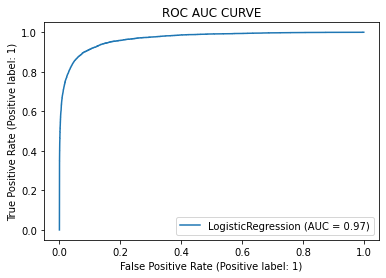

In [45]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(LR,x_test,y_test)
plt.title('ROC AUC CURVE')
plt.show

### Predicting on test data

In [46]:
# convert all messages to lower case
test_data['comment_text'] = test_data['comment_text'].str.lower()

In [47]:
# Replace emailaddresses with 'emailaddress'
test_data['comment_text'] = test_data['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

In [48]:
# Replace Urls with 'webaddress'
test_data['comment_text'] = test_data['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

In [49]:
# Replace money symbols with 'moneysymbols' 
test_data['comment_text'] = test_data['comment_text'].str.replace(r'£|\$', 'dollers')

In [50]:
# Replace 10 digit phone numbers 
test_data['comment_text'] = test_data['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

In [51]:
# Replace numbers with 'number'
test_data['comment_text'] = test_data['comment_text'].str.replace(r'\d+(\.\d+)?', 'number')

In [52]:
# Remove Punctuatuations
test_data['comment_text'] = test_data['comment_text'].apply(lambda x: ' '.join(term for term in x.split() if term not in string.punctuation))

In [53]:
test_data['comment_text']=test_data['comment_text'].str.replace(r'[^\w\d\s]','')

In [54]:
# Remove White space between terms with single space
test_data['comment_text']=test_data['comment_text'].str.replace(r'\s+',' ')

In [55]:
# Remove leading and trailing white space
test_data['comment_text']=test_data['comment_text'].str.replace(r'^\s+|\s+?$','')

In [56]:
# Remove Stopwords
stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
test_data['comment_text'] = test_data['comment_text'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

In [58]:
# Lematization
lemma=WordNetLemmatizer()
test_data['comment_text'] = test_data['comment_text'].apply(lambda x: ' '.join(lemma.lemmatize(word) for word in x.split()))

In [59]:
featurestest = tf_vec.transform(test_data['comment_text'])

In [60]:
testprediction=LR.predict(featurestest)

In [63]:
testprediction

array([1, 0, 0, ..., 0, 0, 1])

### Creating the final dataset

In [64]:
test_data['Prediction']=testprediction

In [65]:
test_data

,id,comment_text,Prediction
0,00001cee341fdb12,yo bitch ja rule succesful youll ever whats ha...,1
1,0000247867823ef7,rfc title fine imo,0
2,00013b17ad220c46,source zawe ashton lapland,0
3,00017563c3f7919a,look back source information updated correct f...,0
4,00017695ad8997eb,anonymously edit article,0
...,...,...,...
153159,fffcd0960ee309b5,totally agree stuff nothing toolongcrap,0
153160,fffd7a9a6eb32c16,throw field home plate get faster throwing cut...,0
153161,fffda9e8d6fafa9e,okinotorishima category see change agree corre...,0
153162,fffe8f1340a79fc2,one founding nation eu germany law return quit...,0


In [66]:
# Saving the DataFrame as csv file
test_data.to_csv('Predicted_test_data.csv')